In [1]:
import scanpy as sc
import os,sys,glob
import pandas as pd
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib.colors import ListedColormap

## Data processing.

In [2]:
adata = sc.read("/home/sonic/scData/anndata/Input_230330_adata_outer_minGenes_50.h5ad")

In [3]:
adata1 = sc.read("/home/sonic/scData/anndata/Output_230331_scVI_hgv_5000_outer_minGenes_50.h5ad")

In [4]:
adata.obs = adata1.obs

In [5]:
adata.obsm = adata1.obsm

In [6]:
adata.X

<1918696x49133 sparse matrix of type '<class 'numpy.float32'>'
	with 5493307174 stored elements in Compressed Sparse Row format>

In [7]:
adata.layers["counts"] = adata.X.copy()

In [8]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata.layers["logcounts"] = adata.X.copy()

In [9]:
adata.raw = adata

In [ ]:
#adata.layers["scaled"] = sc.pp.scale(adata, copy = True).X

In [10]:
new_cluster_names = [
    'Oligo OPALIN (C0)', 
    'Exc L2-3 LINC00507 KCNIP4 (C1)', 
    'Neural crest (C2)',
    'Exc LINC01210 (Fetal) (C3)',
    'Exc L2-3 SATB2 (Fetal) (C4)',
    'Astro FGFR3 (C5)',
    'Neural crest (C6)',
    'Exc DLX5 (Fetal) (C7)',
    'Inh RXRG (Fetal) (C8)', 
    'Inh VIP CHRNA2 (C9)',
    'Exc L5-6 NEUROD6 (Fetal) (C10)',
    'Exc L5-6 RORB ARSJ (C11)',
    'Granule neuron (C12)',
    'Exc L4 RORB TSHZ2 (C13)',
    'Astro (Fetal) (C14)',
    'OPC PDGFRA (C15)',
    'Micro TYROBP (C16)',
    'Neural crest (C17)',
    'Inh PVALB NXPH1 (C18)', 
    'Inh SST GRIK1 (C19)',
    'Exc L5-6 HS3ST4 (Fetal) (C20)',
    'Exc L2-3 EEF1A1 (Fetal) (C21)',
    'Neural crest (C22)',
    'Purkinje neuron (C23)',
    'Exc L2-3 RORB COL5A2 (C24)',
    'Exc L5-6 FEZF2 SEMA3E (C25)',
    'Exc SKOR2 (Fetal) (C26)',
    'Exc L5-6 GNG8 (Fetal) (C27)',
    'Exc L2-6 THEMIS KCNIP4 (C28)',
    'Endo NOSTRIN (C29)',
    'Inh LAMP5 CPLX3 (C30)', 
    'Exc ARHGAP11B (Fetal) (C31)',
    'Exc MTRNR2L6 (Fetal) (C32)',
    'Exc L2-4 LIMS2 (Neonatal) (C33)',
    'Astro FGFR3 (C34)',
    'Neural crest (C35)',
    'Exc L5-6 FEZF2 HTR2C (C36)',
    'Neural crest (C37)',
    'Inh PVALB COL15A1 (C38)',
    'Exc L5-6 THEMIS POSTN (C39)',
    'Neuroblast (C40)',
    'Micro TYROBP (C41)',
    'Erythrocyte (C42)',
    'OPC PDGFRA (C43)',
    'Exc L5-6 FEZF2 ERG (C44)',
    'Exc L5-6 SLC17A7 CSN1S1 (C45)',
    'Oligo OPALIN (C46)',
    ]

In [11]:
adata.rename_categories('leiden', new_cluster_names)

In [12]:
 categories = [
    "Exc SKOR2 (Fetal) (C26)", 
    "Exc L5-6 NEUROD6 (Fetal) (C10)", 
    "Exc DLX5 (Fetal) (C7)", 
    "Exc LINC01210 (Fetal) (C3)", 
    "Exc L5-6 GNG8 (Fetal) (C27)", 
    "Exc L2-3 EEF1A1 (Fetal) (C21)", 
    "Exc L2-3 SATB2 (Fetal) (C4)", 
    "Exc L5-6 HS3ST4 (Fetal) (C20)", 
    "Exc ARHGAP11B (Fetal) (C31)", 
    "Exc MTRNR2L6 (Fetal) (C32)", 
    "Exc L2-4 LIMS2 (Neonatal) (C33)",
    "Exc L2-3 LINC00507 KCNIP4 (C1)", 
    "Exc L5-6 RORB ARSJ (C11)", 
    "Exc L4 RORB TSHZ2 (C13)", 
    "Exc L2-3 RORB COL5A2 (C24)", 
    "Exc L5-6 FEZF2 SEMA3E (C25)", 
    "Exc L2-6 THEMIS KCNIP4 (C28)", 
    "Exc L5-6 FEZF2 HTR2C (C36)", 
    "Exc L5-6 THEMIS POSTN (C39)", 
    "Exc L5-6 FEZF2 ERG (C44)", 
    "Exc L5-6 SLC17A7 CSN1S1 (C45)",
    "Neural crest (C6)", 
    "Neural crest (C37)", 
    "Neural crest (C2)", 
    "Neural crest (C17)", 
    "Neural crest (C22)", 
    "Neural crest (C35)",
    "Inh RXRG (Fetal) (C8)", 
    "Inh VIP CHRNA2 (C9)", 
    "Inh PVALB NXPH1 (C18)", 
    "Inh SST GRIK1 (C19)", 
    "Inh LAMP5 CPLX3 (C30)", 
    "Inh PVALB COL15A1 (C38)", 
    "Astro (Fetal) (C14)", 
    "Astro FGFR3 (C34)", 
    "Astro FGFR3 (C5)",
    "Oligo OPALIN (C46)",
    "Oligo OPALIN (C0)",
    "OPC PDGFRA (C43)", 
    "OPC PDGFRA (C15)",
    "Micro TYROBP (C41)", 
    "Micro TYROBP (C16)",
    "Erythrocyte (C42)", 
    "Endo NOSTRIN (C29)",
    "Granule neuron (C12)",
    "Purkinje neuron (C23)",
    "Neuroblast (C40)"
    ]

In [13]:
adata.obs["cluster_number"] = adata.obs["leiden"].copy()

In [14]:
adata.obs["cluster_number"]

F2S4_160113_027_A01                        Inh SST GRIK1 (C19)
F2S4_160113_027_B01                        Inh VIP CHRNA2 (C9)
F2S4_160113_027_C01                      Inh LAMP5 CPLX3 (C30)
F2S4_160113_027_D01                        Inh VIP CHRNA2 (C9)
F2S4_160113_027_E01                        Inh VIP CHRNA2 (C9)
                                             ...              
hsDG208PD_TTTGTTGGTCGCGTCA-1             Inh PVALB NXPH1 (C18)
hsDG208PD_TTTGTTGGTGAACGGT-1                  OPC PDGFRA (C15)
hsDG208PD_TTTGTTGGTGTTGATC-1               Inh VIP CHRNA2 (C9)
hsDG208PD_TTTGTTGTCATCGGGC-1    Exc L2-3 LINC00507 KCNIP4 (C1)
hsDG208PD_TTTGTTGTCCAAATGC-1                  Astro FGFR3 (C5)
Name: cluster_number, Length: 1918696, dtype: category
Categories (47, object): ['Oligo OPALIN (C0)', 'Exc L2-3 LINC00507 KCNIP4 (C1)', 'Neural crest (C2)', 'Exc LINC01210 (Fetal) (C3)', ..., 'OPC PDGFRA (C43)', 'Exc L5-6 FEZF2 ERG (C44)', 'Exc L5-6 SLC17A7 CSN1S1 (C45)', 'Oligo OPALIN (C46)']

In [15]:
cluster_number = [
    'C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
    'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46'
]

In [16]:
adata.rename_categories('cluster_number', cluster_number)

In [17]:
adata.obs["cluster_number"]

F2S4_160113_027_A01             C19
F2S4_160113_027_B01              C9
F2S4_160113_027_C01             C30
F2S4_160113_027_D01              C9
F2S4_160113_027_E01              C9
                               ... 
hsDG208PD_TTTGTTGGTCGCGTCA-1    C18
hsDG208PD_TTTGTTGGTGAACGGT-1    C15
hsDG208PD_TTTGTTGGTGTTGATC-1     C9
hsDG208PD_TTTGTTGTCATCGGGC-1     C1
hsDG208PD_TTTGTTGTCCAAATGC-1     C5
Name: cluster_number, Length: 1918696, dtype: category
Categories (47, object): ['C0', 'C1', 'C2', 'C3', ..., 'C43', 'C44', 'C45', 'C46']

In [18]:
adata.write_h5ad('Output_230707_normalized_SYK.h5ad')

## Sex Hormone

In [15]:
marker_genes = ['ESR1', 'ESR2', 'PTPRD']

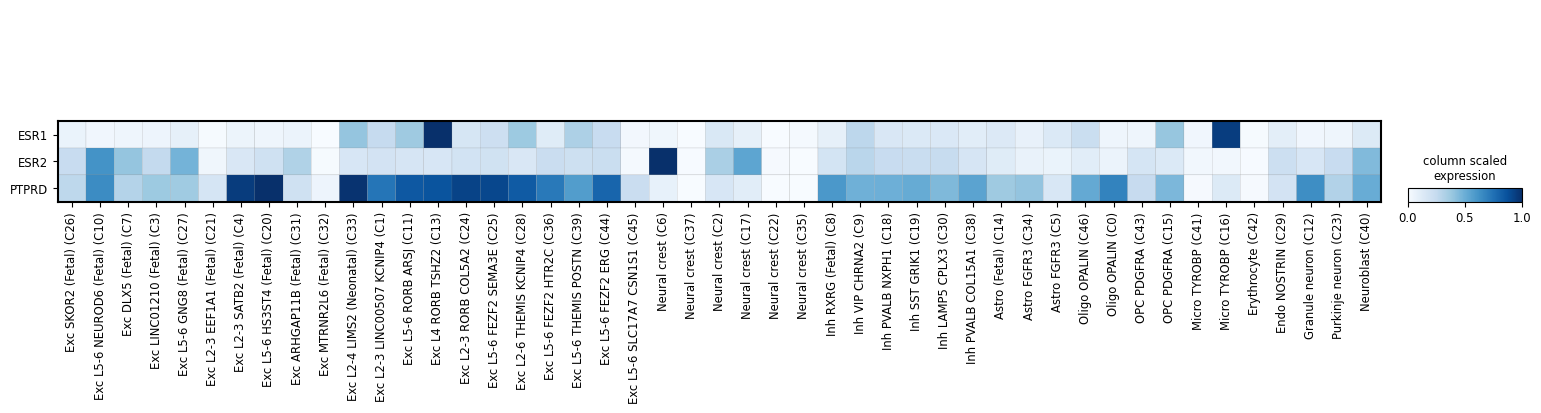

In [18]:
sc.pl.matrixplot(adata, marker_genes, groupby='leiden', dendrogram=False, cmap='Blues', 
                 standard_scale='var', colorbar_title='column scaled\nexpression', swap_axes= True, categories_order = categories,
                 save = 'matrixplot_SexHormone.pdf')

/home/ssun1116/.conda/envs/sc_toolbox/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


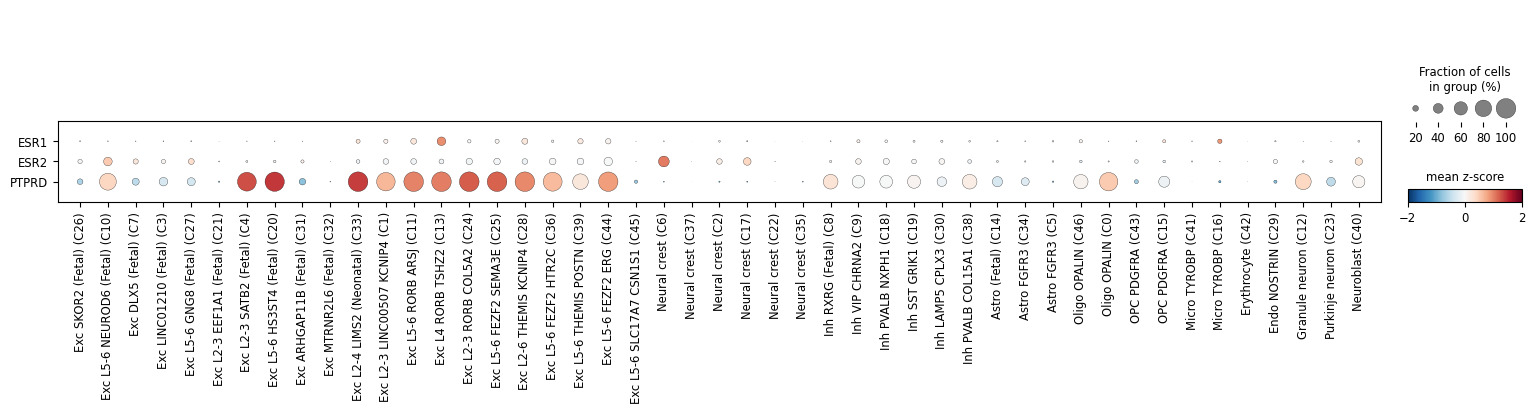

In [ ]:
sc.pl.dotplot(adata, marker_genes, groupby = 'leiden', dendrogram = False, cmap='RdBu_r',
              colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, swap_axes= True, categories_order = categories,
             save = 'dotplot_zscore_SexHormone.pdf')

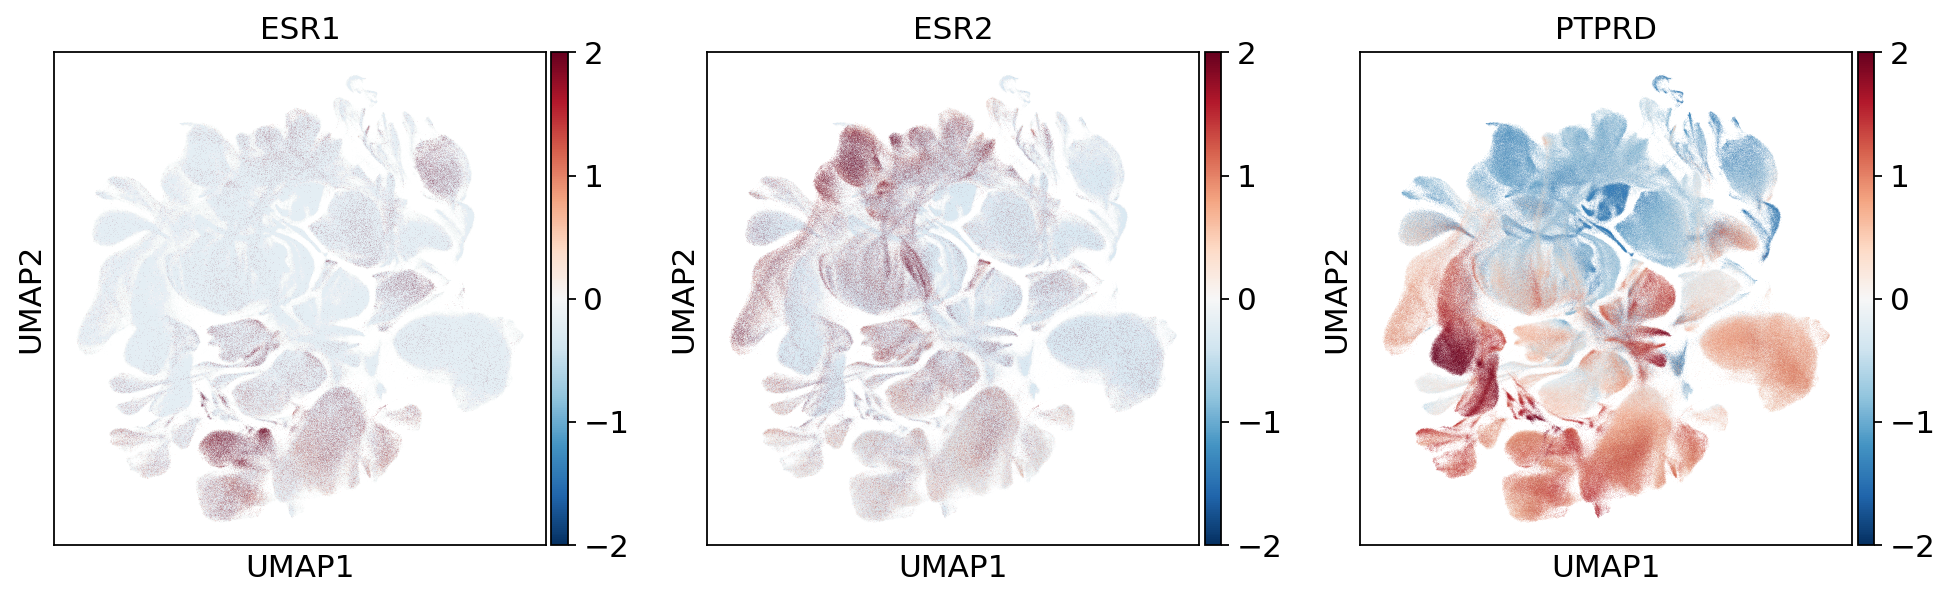

In [34]:
sc.set_figure_params(figsize=(4, 4), vector_friendly = True)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

sc.pl.umap(adata, color = marker_genes, cmap='RdBu_r', layer = "scaled", vmin = -2, vmax = 2, 
           legend_loc='on data', legend_fontsize=5,
           save = "umap_zscore_SexHormone.pdf")

/home/ssun1116/.conda/envs/sc_toolbox/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


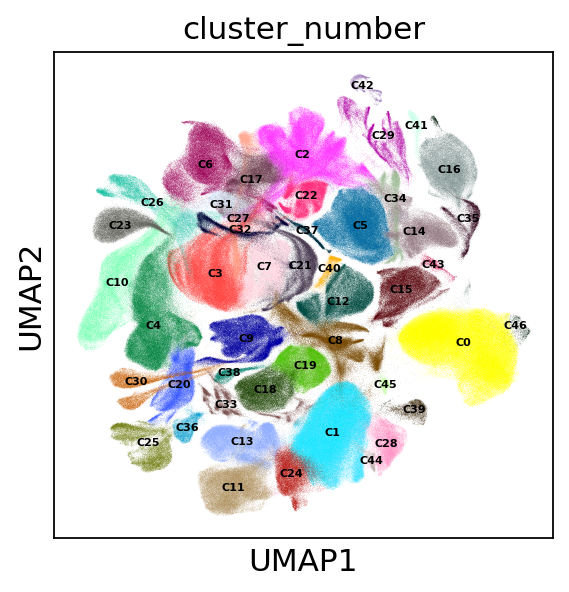

In [38]:
sc.set_figure_params(figsize=(4, 4), vector_friendly = True)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'
sc.pl.umap(adata, color = "cluster_number", , ,
           save = "umap_clusternumber.pdf")

/home/ssun1116/.conda/envs/sc_toolbox/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


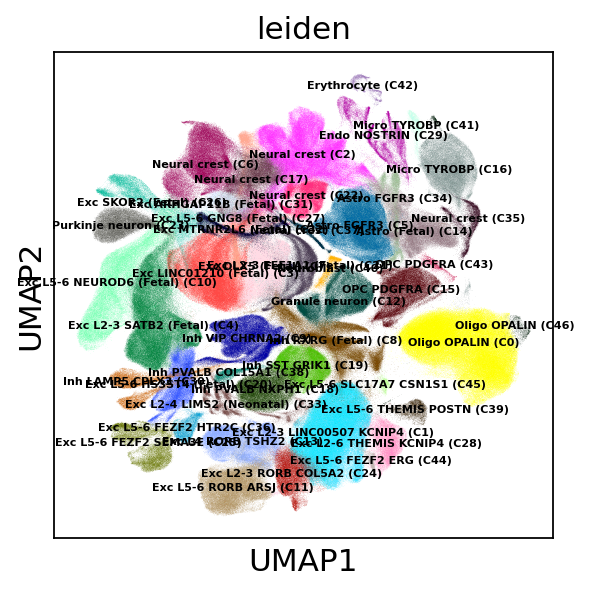

In [39]:
sc.set_figure_params(figsize=(4, 4), vector_friendly = True)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'
sc.pl.umap(adata, color = "leiden", legend_loc='on data', legend_fontsize=5,
           save = "umap_leiden.pdf")

## Hodge2019 Main Markers

In [ ]:
marker_genes_dict = {
	'Inh1': ['GAD1', 'ADARB2', 'PAX6', 'LAMP5'], 
	'Inh2': ['VIP'], 
	'Inh3': ['LHX6', 'SST'], 
	'Inh4': ['PVALB'],
    'Exc': ['SLC17A7', 'LINC00507', 'RORB', 'THEMIS', 'FEZF2'],
    'Non': ['SLC1A3', 'PDGFRA', 'FGFR3', 'OPALIN', 'NOSTRIN', 'TYROBP'],
}

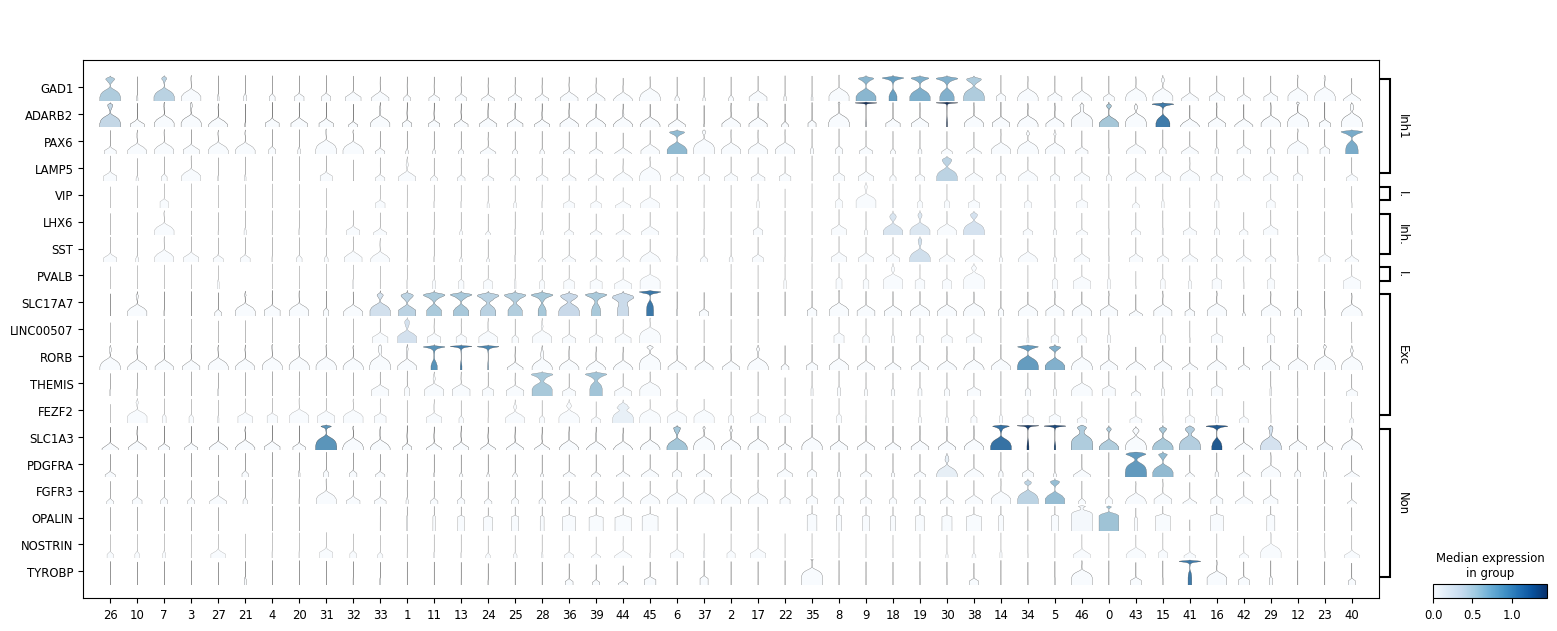

In [ ]:
ax = sc.pl.stacked_violin(adata, marker_genes_dict, 
                          groupby='leiden', swap_axes= True, log = True,
                          categories_order = ["26", "10", "7", "3", "27", "21", "4", "20", "31", "32", "33",
                                              "1", "11", "13", "24", "25", "28", "36", "39", "44", "45",
                                              "6", "37", "2", "17", "22", "35",
                                              "8", "9", "18", "19", "30", "38", 
                                              "14", "34", "5",
                                              "46", "0",
                                              "43", "15",
                                              "41", "16",
                                              "42", "29",
                                              "12",
                                              "23",
                                              "40"
                                             ])

         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 0, 1, 2, etc.
var_group_labels: Inh1, Inh2, Inh3, etc.


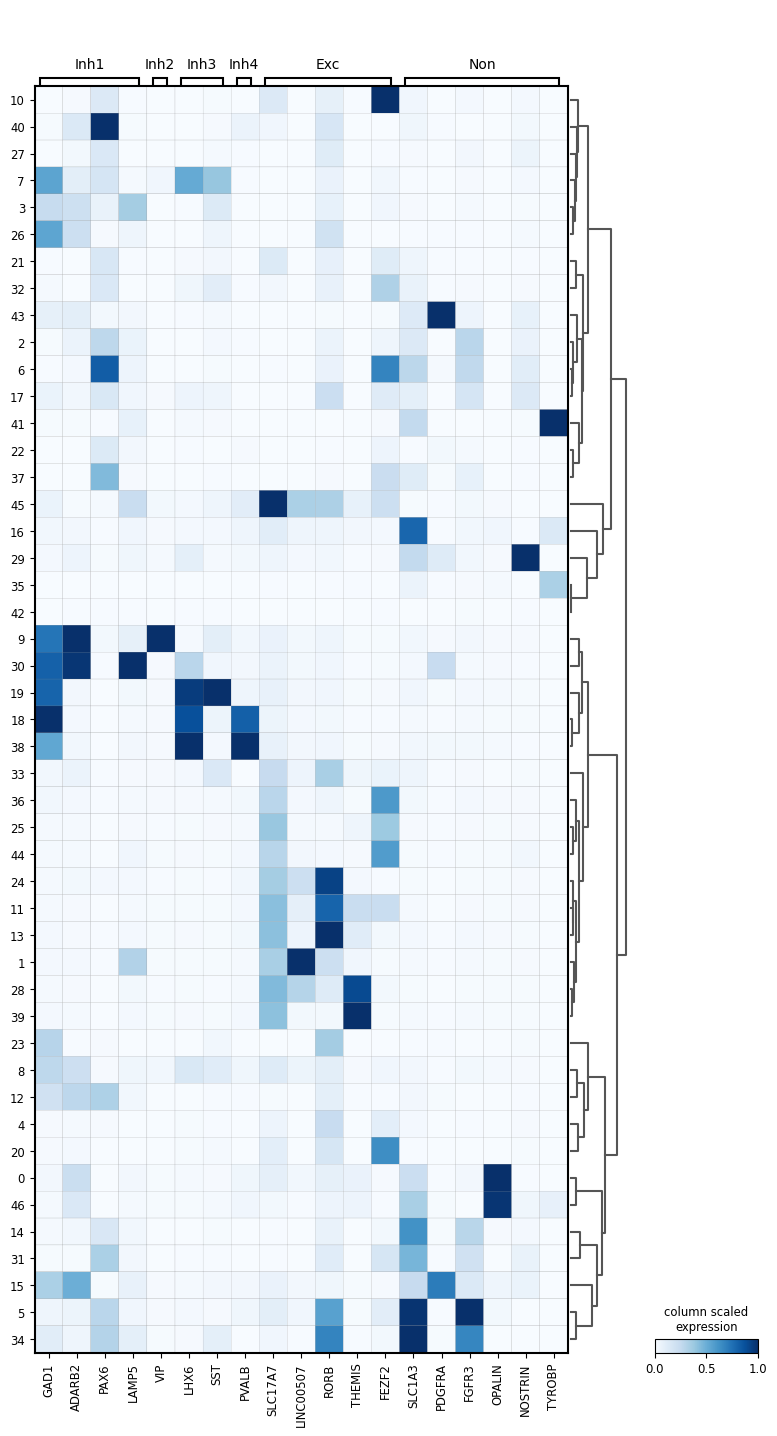

In [ ]:
sc.pl.matrixplot(adata, marker_genes_dict, groupby='leiden', dendrogram=True, cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')

In [61]:
new_cluster_names = [
    'Oligo OPALIN (0)', 
    'Exc L2-3 LINC00507 KCNIP4 (1)', 
    'Neural crest (2)',
    'Exc LINC01210 (Fetal) (3)',
    'Exc L2-3 SATB2 (Fetal) (4)',
    'Astro FGFR3 (5)',
    'Neural crest (6)',
    'Exc DLX5 (Fetal) (7)',
    'Inh RXRG (Fetal) (8)', 
    'Inh VIP CHRNA2 (9)',
    'Exc L5-6 NEUROD6 (Fetal) (10)',
    'Exc L5-6 RORB ARSJ (11)',
    'Granule neuron (12)',
    'Exc L4 RORB LINC02196 (13)',
    'Astro (Fetal) (14)',
    'OPC PDGFRA (15)',
    'Micro TYROBP (16)',
    'Neural crest (17)',
    'Inh PVALB MEPE (18)', 
    'Inh SST LINC01687 (19)',
    'Exc L5-6 HS3ST4 (Fetal) (20)',
    'Exc L2-3 EEF1A1 (Fetal) (21)',
    'Neural crest (22)',
    'Purkinje neuron (23)',
    'Exc L2-3 RORB COL5A2 (24)',
    'Exc L5-6 FEZF2 GSTA1 (25)',
    'Exc SKOR2 (Fetal) (26)',
    'Exc L5-6 GNG8 (Fetal) (27)',
    'Exc L2-6 THEMIS RXFP2 (28)',
    'Endo NOSTRIN (29)',
    'Inh LAMP5 CPLX3 (30)', 
    'Exc ARHGAP11B (Fetal) (31)',
    'Exc MTRNR2L6 (Fetal) (32)',
    'Exc L2-4 LIMS2 (Neonatal) (33)',
    'Astro FGFR3 (34)',
    'Neural crest (35)',
    'Exc L5-6 FEZF2 HTR2C (36)',
    'Neural crest (37)',
    'Inh PVALB COL15A1 (38)',
    'Exc L5-6 THEMIS POSTN (39)',
    'Neuroblast (40)',
    'Micro TYROBP (41)',
    'Erythrocyte (42)',
    'OPC PDGFRA (43)',
    'Exc L5-6 FEZF2 CSN1S1 (44)',
    'Exc L5-6 SLC17A7 CSN1S1 (45)',
    'Oligo OPALIN (46)',
    ]

In [62]:
adata.rename_categories('leiden', new_cluster_names)

In [48]:
 categories = [
    "Exc SKOR2 (Fetal) (26)", 
    "Exc L5-6 NEUROD6 (Fetal) (10)", 
    "Exc DLX5 (Fetal) (7)", 
    "Exc LINC01210 (Fetal) (3)", 
    "Exc L5-6 GNG8 (Fetal) (27)", 
    "Exc L2-3 EEF1A1 (Fetal) (21)", 
    "Exc L2-3 SATB2 (Fetal) (4)", 
    "Exc L5-6 HS3ST4 (Fetal) (20)", 
    "Exc ARHGAP11B (Fetal) (31)", 
    "Exc MTRNR2L6 (Fetal) (32)", 
    "Exc L2-4 LIMS2 (Neonatal) (33)",
    "Exc L2-3 LINC00507 KCNIP4 (1)", 
    "Exc L5-6 RORB ARSJ (11)", 
    "Exc L4 RORB LINC02196 (13)", 
    "Exc L2-3 RORB COL5A2 (24)", 
    "Exc L5-6 FEZF2 GSTA1 (25)", 
    "Exc L2-6 THEMIS RXFP2 (28)", 
    "Exc L5-6 FEZF2 HTR2C (36)", 
    "Exc L5-6THEMIS POSTN (39)", 
    "Exc L5-6 FEZF2 CSN1S1 (44)", 
    "Exc L5-6 SLC17A7 CSN1S1 (45)",
    "Neural crest (6)", 
    "Neural crest (37)", 
    "Neural crest (2)", 
    "Neural crest (17)", 
    "Neural crest (22)", 
    "Neural crest (35)",
    "Inh RXRG (Fetal) (8)", 
    "Inh VIP CHRNA2 (9)", 
    "Inh PVALB MEPE (18)", 
    "Inh SST LINC01687 (19)", 
    "Inh LAMP5 CPLX3 (30)", 
    "Inh PVALB COL15A1 (38)", 
    "Astro (Fetal) (14)", 
    "Astro FGFR3 (34)", 
    "Astro FGFR3 (5)",
    "Oligo OPALIN (46)",
    "Oligo OPALIN (0)",
    "OPC PDGFRA (43)", 
    "OPC PDGFRA (15)",
    "Micro TYROBP (41)", 
    "Micro TYROBP (16)",
    "Erythrocyte (42)", 
    "Endo NOSTRIN (29)",
    "Granule neuron (12)",
    "Purkinje neuron (23)",
    "Neuroblast (40)"
    ]

In [63]:
sc.pl.stacked_violin(adata, marker_genes_dict, groupby='leiden', log = True, colorbar_title='log-normalized\nexpression', swap_axes= True, categories_order = categories);

ERROR: Please check that the categories given by the `order` parameter match the categories that want to be reordered.

Mismatch: {'Astro (Fetal) (14)', 'Exc L2-3 EEF1A1 (Fetal) (21)', 'Exc SKOR2 (Fetal) (26)', 'Exc L2-3 SATB2 (Fetal) (4)', 'Exc L5-6 HS3ST4 (Fetal) (20)', 'Exc ARHGAP11B (Fetal) (31)', 'Exc L5-6 NEUROD6 (Fetal) (10)', 'Exc L2-3 RORB COL5A2 (24)', 'Exc L4 RORB LINC02196 (13)', 'Exc L2-3 LINC00507 KCNIP4 (1)', 'Exc L5-6 RORB ARSJ (11)', 'Exc L5-6 FEZF2 HTR2C (36)', 'Exc L5-6 SLC17A7 CSN1S1 (45)', 'Exc L5-6 FEZF2 CSN1S1 (44)', 'Exc LINC01210 (Fetal) (3)', 'Exc L5-6 GNG8 (Fetal) (27)', 'Exc L5-6 FEZF2 GSTA1 (25)', 'Exc L2-4 LIMS2 (Neonatal) (33)', 'Exc DLX5 (Fetal) (7)', 'Exc MTRNR2L6 (Fetal) (32)', 'Exc L5-6 THEMIS POSTN (39)', 'Exc L2-6 THEMIS RXFP2 (28)', 'Inh RXRG (Fetal) (8)'}

Given order categories: ['Exc fetal SKOR2 (26)', 'Exc fetal NEUROD6 (10)', 'Exc fetal DLX5 (7)', 'Exc fetal LINC01210 (3)', 'Exc fetal GNG8 (27)', 'Exc fetal EEF1A1 (21)', 'Exc fetal SATB2 (4)',

AttributeError: 'StackedViolin' object has no attribute 'kwds'

In [50]:
sc.tl.dendrogram(adata, groupby='leiden')

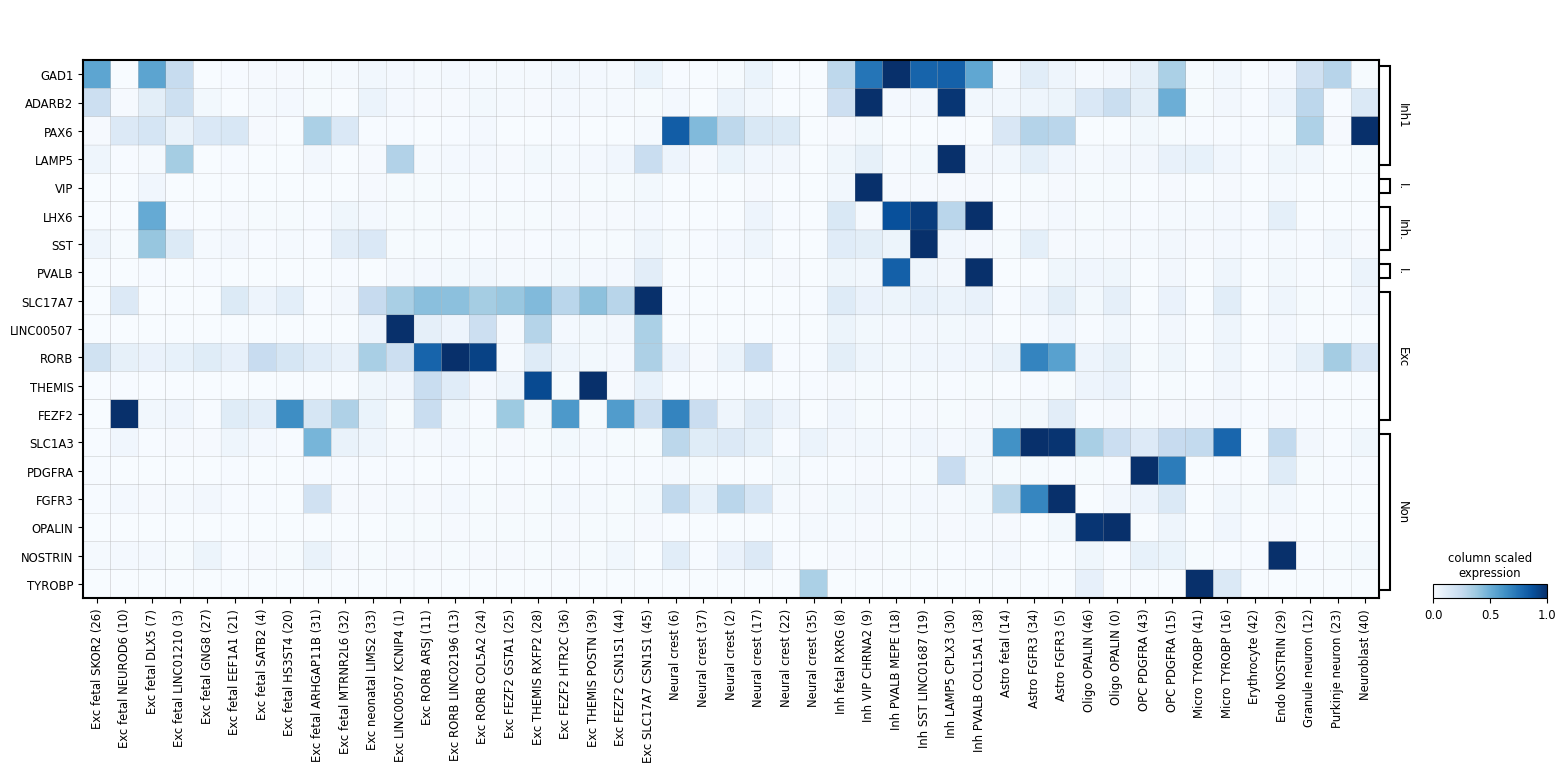

In [ ]:
sc.pl.matrixplot(adata, marker_genes_dict, groupby='leiden', dendrogram=False, cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression', swap_axes= True, categories_order = categories)

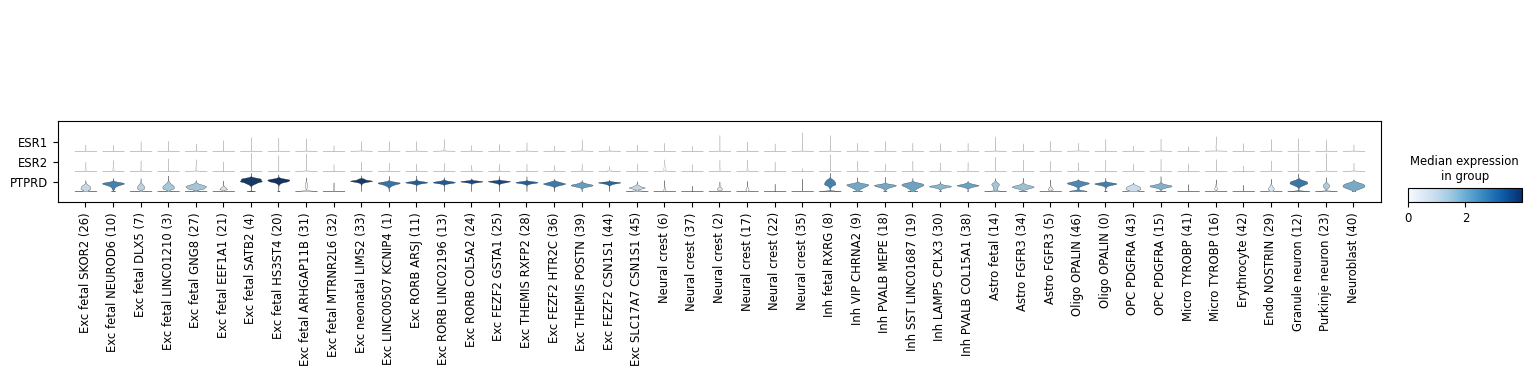

In [ ]:
marker_genes = ['ESR1', 'ESR2', 'PTPRD']
ax = sc.pl.stacked_violin(adata, marker_genes, 
                          groupby='leiden', swap_axes= True, use_raw = True, categories_order = categories)

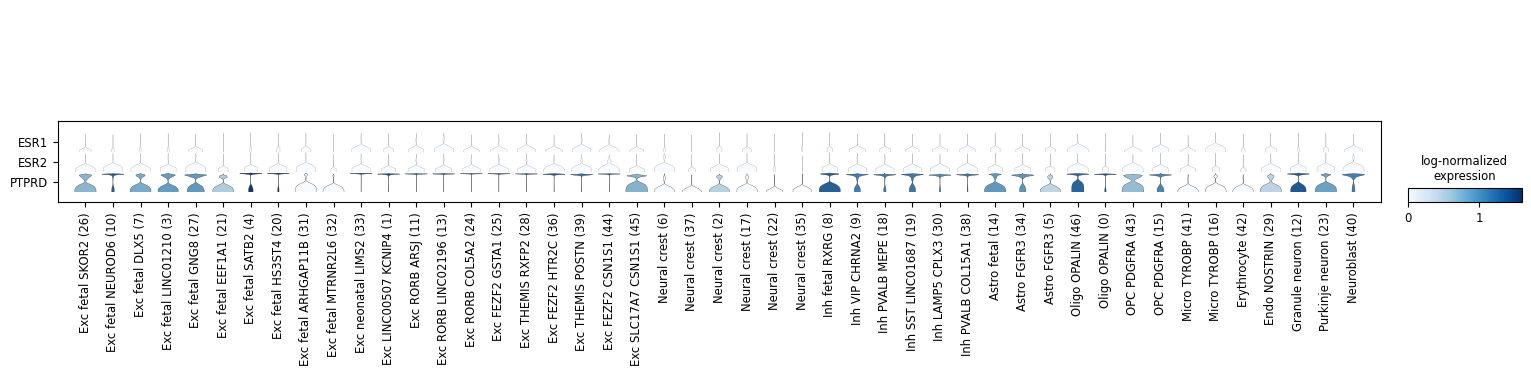

In [ ]:
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', log = True, colorbar_title='log-normalized\nexpression', swap_axes= True, categories_order = categories);

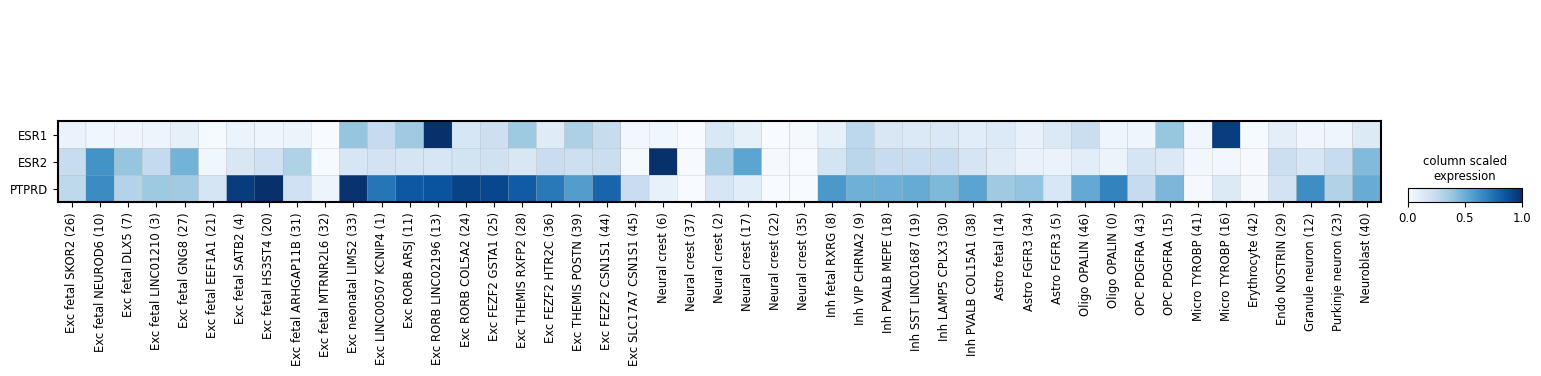

In [ ]:
sc.pl.matrixplot(adata, marker_genes, groupby='leiden', dendrogram=False, cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression', swap_axes= True, categories_order = categories)

In [41]:
adata.write_h5ad('/home/ssun1116/Output_230701_SYK_sampling.h5ad')

In [ ]:
sc.pl.matrixplot(adata, marker_genes_dict, groupby='leiden', dendrogram=True,
                 colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r')

KeyError: 'scaled'

## Original codes.

In [7]:
marker_genes = ['ESR1', 'ESR2', 'PTPRD']

In [10]:
np.min(adata.layers['scaled'])

-0.5706501

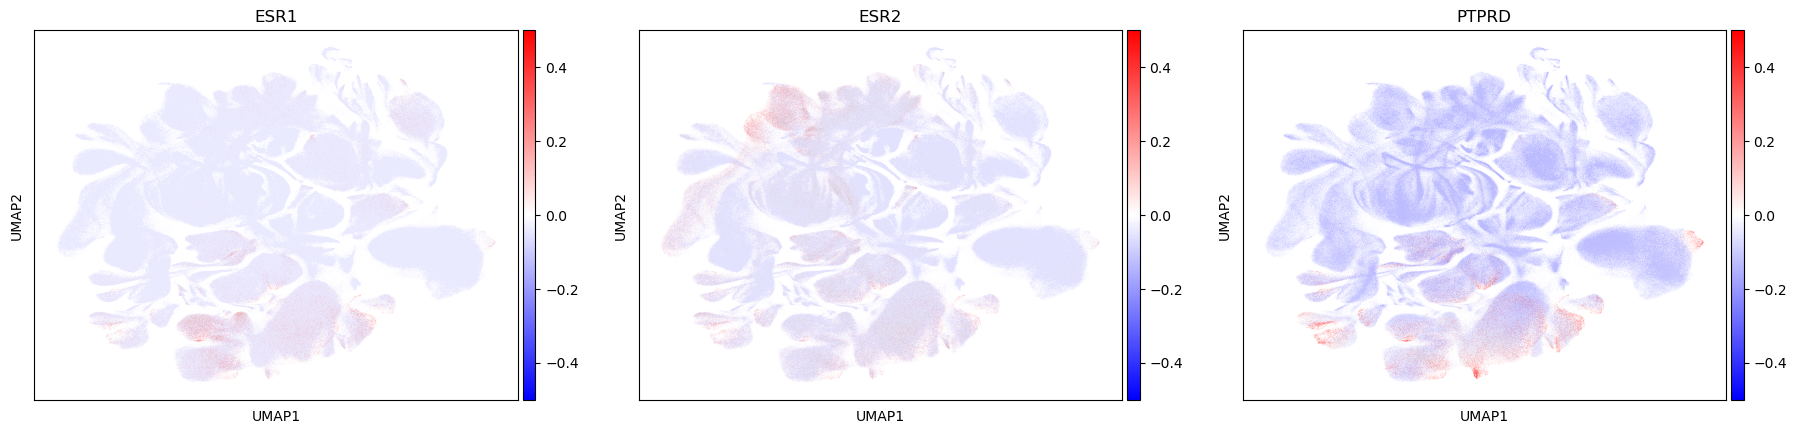

In [15]:
sc.pl.umap(adata, layer = 'scaled', color= marker_genes, cmap='bwr', vmin = -0.5, vmax = 0.5)

In [1]:
adata.write('/home/sonic/scData/anndata/Output_230331_scVI_hgv_5000_outer_minGenes_50.AllGenes_20230630.h5ad')

NameError: name 'adata' is not defined

In [ ]:
ax = sc.pl.stacked_violin(adata, marker_genes, 
                          groupby='leiden', swap_axes= True, log = True,
                          categories_order = ["26", "10", "7", "3", "27", "21", "4", "20", "31", "32", "33",
                                              "1", "11", "13", "24", "25", "28", "36", "39", "44", "45",
                                              "6", "37", "2", "17", "22", "35",
                                              "8", "9", "18", "19", "30", "38", 
                                              "14", "34", "5",
                                              "46", "0",
                                              "43", "15",
                                              "41", "16",
                                              "42", "29",
                                              "12",
                                              "23",
                                              "40"
                                             ])

In [ ]:
# https://www.color-hex.com/color-names.html
col_dict_leiden = {
    # Clade 1-1 (cereberum or celebellum)
    '4': '#ff9f00', # Fetal, L2-3 CUX2, L4 RORB (Cerebrum)
    '20': '#ff9f00', # Fetal, L5-6 TLE4 (Cerebrum)
    
    '23': '#fe6f5e', # Purkanje
    '8': '#702963', # Cerebrum (IN but also Ext, Limbic, Others -> further clustering)
    '12': '#b0bf1a', # GR, Interneuron, UniBrush 포함
    
    # Clade 1-2-1
    '15': '#ff91af', # OPC
    '9': '#702963', # Adult, BA9
    '30': '#702963', # Adult, BA24, BA4, BA9, BA21 ? Why it's outward?
    
    '19': '#702963', # Adult, BA24, BA4, BA9, BA21
    '18': '#702963', # Adult, BA24, BA4, BA9, BA21
    '38': '#702963', # Adult, BA9
    
    # Clade 1-2-2
    '36': '#ff9f00', # Adult, L5-6 TLE4, NP from 20 (BA4 + BA9) (L5/6 TLE4 mature?)
    '33': '#ff9f00', # Fetal, L2-3 CUX2, L4 RORB from 4 (L2-3 immature?)
    
    '25': '#ff9f00', # Adult, L5-6 TLE4 from 20 (BA4 + BA9) (L5/6 TLE4 mature?)
    '11': '#ff9f00', # Adult, L5 IT; RORB
    '44': '#ff9f00', # Adult, L5 ET (BA4 + BA9)
    
    '13': '#ff9f00', # Adult, L4 RORB; RORB 
    '24': '#ff9f00', # Adult, L2/3 IT; RORB
    
    '1': '#ff9f00', # Adult, L2-4 from 33 and 4
    '28': '#ff9f00', # Adult, L2-4, 5-6
    '39': '#ff9f00', # Adult, L5-6 THEMIS, IT Car3
    
    ###
    
    # Clade 2-1
    '0': '#a3c1ad', # Adult, OD
    '46': '#a3c1ad', # OD, with Microglia
    
    '5': '#0048ba', # Late adult, Astro
    '34': '#0048ba', # Neonatal, Astro
    
    '14': '#0048ba', # Fetal Astro인데, 31번 Ext와 같이 나옴 (Glioblast 포함)
    '31': '#ff9f00', # Cerebrum
    
    # Clade 2-2-1-1 
    '10': '#ff9f00',# Neuroblast 40% (Cortex) (L5/6 TLE4 immature?)
    '40': '#e63e62', # Fetal, Neuroblast (L5/6 TLE4 immature?)
    
    '27': '#ff9f00',# Fetal, Neuroblast 20%, Neuro Crest 3% (Diencephalon, Thalamus and Pons) (L5/6 TLE4 immature?)
    '7': '#ff9f00', # Fetal, Mostly cortex but GE

    '3': '#ff9f00', # Fetal, Neuroblast 30% (Mix of Midbrain, Forebrain, Hindbrain)
    '26': '#ff9f00', # Fetal, Neuroblast 20% (Cerebellum)  

    # Clade 2-2-1-2 (New neuron)
    '43': '#ff91af', # 초기 나이의 OD로 잡히지만, 사실 OPC? 그런데 왜 Ext clade에서?
    '21': '#ff9f00', # Fetal, Trevino, Cortex
    '32': '#ff9f00', # Fetal, Eze, Striatum
    
    '22': '#458b74', # Neural crest,  Ext Clade 1과 묶임
    '37': '#458b74', # Neural crest,  Ext Clade 1과 묶임    
    
    '2': '#458b74', # Neural crest, Ext Clade 1과 묶임
    '6': '#458b74', # Neural crest,  Ext Clade 1과 묶임
    '17': '#2f847c', # Striatum,  Ext Clade 1과 묶임
    
    # Clade 2-2-2 (MG)
    '45': '#ff9f00', # L5 (BA9 only) 왜인지 모르겠지만, MG랑 비슷하게 나오는것
    '16': '#fdee00', # Adult, MG
    
    '35': '#458b74', # Astro 혹은 MG로 가는 RG, Fetal에 해당
    '42': '#bfff00', # fetal only, Erythrocyte
    
    '29': '#bfff00', # from fetal to adult, Vascular or endothelial, MG와 같은 clade
    '41': '#fdee00', # Fetal
}

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
pd.crosstab(adata.obs['cluster_original'], adata.obs['leiden'])